# Project Workflow

This document outlines the structured approach to solving a business problem through data analysis, preprocessing, feature engineering, exploratory data analysis, and predictive modeling.

## 1. Business Problem Statement
### Objective
Define the core business problem, including context, goals, and key performance indicators (KPIs) to align the analysis with business objectives.

## 2. Data Import and Preprocessing
### Overview
Load the raw datasets from relevant sources and perform initial cleaning, handling missing values, and ensuring data consistency for downstream analysis.

## 3. Feature Engineering
### Purpose
Create meaningful features through transformations, aggregations, or domain-specific calculations to enhance model performance and interpretability.

## 4. Final Dataset Preparation
### Goal
Consolidate the cleaned and engineered features into a finalized dataset, ready for exploratory analysis and modeling.

## 5. Data Analysis
### Scope
Conduct a high-level analysis to understand data distributions, relationships, and potential anomalies that could impact modeling.

## 6. Exploratory Data Analysis (EDA) for Pattern Identification
### Focus
Perform in-depth EDA on selected variables using visualizations and statistical methods to uncover trends, patterns, and insights.

## 7. Function Development for Bar Data Extraction
### Description
Develop reusable functions to extract and preprocess individual bar data, enabling efficient analysis and modeling.

## 8. ARIMA Optimizer Development
### Approach
Design and implement an ARIMA model optimizer to fine-tune parameters for accurate time-series forecasting.

## 9. Forecasting and Prediction
### Outcome
Generate forecasts using the optimized ARIMA model, evaluate performance metrics, and interpret results to support business decision-making.

# Business Problem Statement

## Overview
A national hotel chain operating multiple bars across its properties is facing significant inventory management challenges. These include frequent stockouts of high-demand items, leading to lost sales and poor customer experiences, and overstocking of slow-moving items, resulting in increased holding costs and wastage. These inefficiencies negatively impact profitability and operational performance.

## Objective
Develop a data-driven forecasting and inventory recommendation system using historical inventory data. The system aims to:
- Accurately predict item-level demand for beverages and other bar inventory items.
- Recommend optimal inventory (par) levels to ensure sufficient stock for high-demand items while minimizing excess inventory for low-demand items.
- Reduce stockouts, lower holding costs, and enhance customer satisfaction by ensuring product availability.

## Scope
The solution will leverage historical sales and inventory data to build a predictive model, focusing on:
- Identifying demand patterns for individual bar items.
- Forecasting future demand at the item level.
- Providing actionable inventory recommendations to bar managers to optimize stock levels and streamline operations.

## Expected Outcomes
- **Improved Inventory Management**: Maintain balanced stock levels to prevent stockouts and overstocking.
- **Cost Reduction**: Minimize wastage and holding costs associated with excess inventory.
- **Enhanced Customer Experience**: Ensure consistent availability of popular items to meet customer demand.
- **Data-Driven Decision Making**: Empower managers with reliable forecasts and inventory recommendations to support operational efficiency.

## **Data Import and Loading** ##

In [2]:
# Loading the data.
import pandas as pd
df = pd.read_excel('Consumption Dataset.xlsx')
df

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2.555040e+03,1824.84,0.00,4379.88
1,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1.344370e+03,0.00,0.00,1344.37
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1.034280e+03,0.00,0.00,1034.28
3,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2.194530e+03,0.00,0.00,2194.53
4,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1.020900e+03,0.00,0.00,1020.90
...,...,...,...,...,...,...,...,...
6570,2024-01-01 21:03:00,Anderson's Bar,Beer,Coors,2.467080e+03,0.00,321.06,2146.02
6571,2024-01-01 21:15:00,Anderson's Bar,Rum,Malibu,8.526513e-14,1743.64,175.05,1568.59
6572,2024-01-01 18:34:00,Anderson's Bar,Whiskey,Jack Daniels,4.192660e+03,0.00,197.60,3995.06
6573,2024-01-01 22:46:00,Thomas's Bar,Vodka,Absolut,2.424950e+03,0.00,128.52,2296.43


In [3]:
#Shape of the given data set.
df.shape

(6575, 8)

In [4]:
# column of the given data set.
df.columns

Index(['Date Time Served', 'Bar Name', 'Alcohol Type', 'Brand Name',
       'Opening Balance (ml)', 'Purchase (ml)', 'Consumed (ml)',
       'Closing Balance (ml)'],
      dtype='object')

In [5]:
# checking the data type of the all the columns

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date Time Served      6575 non-null   datetime64[ns]
 1   Bar Name              6575 non-null   object        
 2   Alcohol Type          6575 non-null   object        
 3   Brand Name            6575 non-null   object        
 4   Opening Balance (ml)  6575 non-null   float64       
 5   Purchase (ml)         6575 non-null   float64       
 6   Consumed (ml)         6575 non-null   float64       
 7   Closing Balance (ml)  6575 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 411.1+ KB


In [6]:
# checking  if entire dataset it has any null values:
print(df.isnull().sum().sum())


0


In [7]:
#checking any duplicate values in the data set
print(df.duplicated().sum())

0


# Feature Engineering

## Overview
The raw dataset requires additional features to enable robust analysis and accurate demand forecasting for bar inventory. By deriving new columns from the existing data, we can capture temporal patterns and contextual factors that influence demand, enhancing the predictive power of the model.

## Engineered Features
The following features will be created to support demand forecasting and inventory optimization:

1. **Date**  
   - **Description**: Extracts the full date (e.g., YYYY-MM-DD) from the timestamp to track daily trends in inventory usage.  
   - **Purpose**: Enables aggregation of sales and inventory data at the daily level for time-series analysis.

2. **Hour_Minute**  
   - **Description**: Extracts the hour and minute from the timestamp (e.g., HH:MM) to capture intraday demand patterns.  
   - **Purpose**: Identifies peak hours of bar activity to optimize stock levels for high-demand periods.

3. **Day of the Week**  
   - **Description**: Derives the day of the week (e.g., Monday, Tuesday) from the date.  
   - **Purpose**: Captures weekly demand variations, as customer behavior may differ significantly between days (e.g., higher demand on Fridays).

4. **Weekday**  
   - **Description**: A binary indicator (1 for Monday–Friday, 0 otherwise) to flag weekdays.  
   - **Purpose**: Distinguishes weekday demand patterns from weekends, which often have different consumption behaviors.

5. **Weekend**  
   - **Description**: A binary indicator (1 for Saturday–Sunday, 0 otherwise) to flag weekends.  
   - **Purpose**: Highlights weekend-specific demand spikes, critical for inventory planning during high-traffic periods.

6. **Month**  
   - **Description**: Extracts the month (e.g., January, February) from the date.  
   - **Purpose**: Captures monthly seasonality in bar item demand, such as increased sales during holiday seasons.

7. **Week Number**  
   - **Description**: Derives the ISO week number (1–52) from the date.  
   - **Purpose**: Enables analysis of weekly trends and supports forecasting models that account for week-to-week variations.

8. **Season**  
   - **Description**: Categorizes the date into seasons (e.g., Winter, Spring, Summer, Fall) based on the month.  
   - **Purpose**: Accounts for seasonal demand patterns, such as higher beverage sales in summer or festive seasons.

## Implementation Notes
- Features will be derived using datetime parsing and transformation techniques in Python (e.g., using `pandas` or `datetime` libraries).
- These features will enhance the dataset’s suitability for exploratory data analysis (EDA) and time-series forecasting models like ARIMA.
- Each feature is designed to capture specific temporal patterns relevant to bar inventory demand

In [8]:

# Extracting  Date
df['Date'] = df['Date Time Served'].dt.date
# Extracting  Hours and minute
df['Hour_Minute'] = df['Date Time Served'].dt.strftime('%H:%M')

# Day name (Monday, Tuesday, etc.)
df['Day_of_Week'] = df['Date Time Served'].dt.day_name()

# Extracting Weekday/Weekend (0=Monday, 6=Sunday)
df['Weekday'] = df['Date Time Served'].dt.weekday
df['Weekend'] = df['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


# Extracting which  Month
df['Month'] = df['Date Time Served'].dt.month

# Extract Week Number
df['Week'] = df['Date Time Served'].dt.isocalendar().week


# Define Season Function
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply Season.
df['Season'] = df['Month'].apply(get_season)


In [9]:
df

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Date,Hour_Minute,Day_of_Week,Weekday,Weekend,Month,Week,Season
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2.555040e+03,1824.84,0.00,4379.88,2023-01-01,19:35,Sunday,6,Weekend,1,52,Winter
1,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1.344370e+03,0.00,0.00,1344.37,2023-01-01,10:07,Sunday,6,Weekend,1,52,Winter
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1.034280e+03,0.00,0.00,1034.28,2023-01-01,11:26,Sunday,6,Weekend,1,52,Winter
3,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2.194530e+03,0.00,0.00,2194.53,2023-01-01,13:53,Sunday,6,Weekend,1,52,Winter
4,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1.020900e+03,0.00,0.00,1020.90,2023-01-01,22:28,Sunday,6,Weekend,1,52,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,2024-01-01 21:03:00,Anderson's Bar,Beer,Coors,2.467080e+03,0.00,321.06,2146.02,2024-01-01,21:03,Monday,0,Weekday,1,1,Winter
6571,2024-01-01 21:15:00,Anderson's Bar,Rum,Malibu,8.526513e-14,1743.64,175.05,1568.59,2024-01-01,21:15,Monday,0,Weekday,1,1,Winter
6572,2024-01-01 18:34:00,Anderson's Bar,Whiskey,Jack Daniels,4.192660e+03,0.00,197.60,3995.06,2024-01-01,18:34,Monday,0,Weekday,1,1,Winter
6573,2024-01-01 22:46:00,Thomas's Bar,Vodka,Absolut,2.424950e+03,0.00,128.52,2296.43,2024-01-01,22:46,Monday,0,Weekday,1,1,Winter


## **Final Dataset Preparation** ##

In [10]:
# Sort the dataframe by Date Time Served
#Because, the given data time is not in correct order.
df = df.sort_values(by='Date Time Served').reset_index(drop=True)
df

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Date,Hour_Minute,Day_of_Week,Weekday,Weekend,Month,Week,Season
0,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1.344370e+03,0.00,0.00,1344.37,2023-01-01,10:07,Sunday,6,Weekend,1,52,Winter
1,2023-01-01 10:28:00,Brown's Bar,Vodka,Grey Goose,2.560440e+03,0.00,0.00,2560.44,2023-01-01,10:28,Sunday,6,Weekend,1,52,Winter
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1.034280e+03,0.00,0.00,1034.28,2023-01-01,11:26,Sunday,6,Weekend,1,52,Winter
3,2023-01-01 11:32:00,Anderson's Bar,Whiskey,Jim Beam,8.720800e+02,0.00,0.00,872.08,2023-01-01,11:32,Sunday,6,Weekend,1,52,Winter
4,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2.194530e+03,0.00,0.00,2194.53,2023-01-01,13:53,Sunday,6,Weekend,1,52,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,2024-01-01 19:36:00,Taylor's Bar,Rum,Captain Morgan,5.870840e+03,1955.11,440.76,7385.19,2024-01-01,19:36,Monday,0,Weekday,1,1,Winter
6571,2024-01-01 21:03:00,Anderson's Bar,Beer,Coors,2.467080e+03,0.00,321.06,2146.02,2024-01-01,21:03,Monday,0,Weekday,1,1,Winter
6572,2024-01-01 21:15:00,Anderson's Bar,Rum,Malibu,8.526513e-14,1743.64,175.05,1568.59,2024-01-01,21:15,Monday,0,Weekday,1,1,Winter
6573,2024-01-01 21:26:00,Thomas's Bar,Rum,Bacardi,1.778360e+03,1195.45,572.60,2401.21,2024-01-01,21:26,Monday,0,Weekday,1,1,Winter


## Analysing the data ##

In [11]:
#This is about descriptive statis about integer and float columns in the given data frame
df.describe()

,Date Time Served,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Weekday,Month,Week
count,6575,6575.000000,6575.000000,6575.000000,6575.000000,6575.000000,6575.000000,6575.0
mean,2023-07-01 09:09:52.033460224,2468.393518,315.841757,299.419264,2484.816011,3.006844,6.455665,26.241065
min,2023-01-01 10:07:00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,2023-03-30 19:35:00,619.135000,0.000000,156.640000,611.000000,1.000000,3.000000,13.0
50%,2023-06-30 18:08:00,1848.440000,0.000000,300.390000,1849.840000,3.000000,6.000000,26.0
75%,2023-10-01 13:59:30,3853.020000,526.345000,450.870000,3906.050000,5.000000,9.000000,39.0
max,2024-01-01 22:46:00,11862.520000,1999.840000,1180.580000,11862.520000,6.000000,12.000000,52.0
std,NaN,2284.556232,582.120264,191.903874,2302.362117,2.002914,3.471840,15.153885


In [12]:
# seeing for which time the bars was starting.
overall_start_time = df['Hour_Minute'].min()
overall_end_time = df['Hour_Minute'].max()

print("Overall starting sales time:", overall_start_time)
print("Overall ending sales time:", overall_end_time)

#Morning 10 A.M to Night 10:59(11)P.M

Overall starting sales time: 10:00
Overall ending sales time: 22:59


In [13]:
# No.of bars , Alcohol types , brand name in the given data set
columns = ['Bar Name', 'Alcohol Type', 'Brand Name',]

# Loop through columns
for col in columns:
    nunique_val = df[col].nunique()
    unique_vals = df[col].unique()
    value_counts = df[col].value_counts().sort_index()

    print(f"Column: {col}")
    print("Number of unique values:", nunique_val)
    print("Value counts:\n", value_counts)
    print("Unique values:", unique_vals)
    print("-" * 60)


Column: Bar Name
Number of unique values: 6
Value counts:
 Bar Name
Anderson's Bar    1102
Brown's Bar       1100
Johnson's Bar     1106
Smith's Bar       1078
Taylor's Bar      1088
Thomas's Bar      1101
Name: count, dtype: int64
Unique values: ["Smith's Bar" "Brown's Bar" "Johnson's Bar" "Anderson's Bar"
 "Taylor's Bar" "Thomas's Bar"]
------------------------------------------------------------
Column: Alcohol Type
Number of unique values: 5
Value counts:
 Alcohol Type
Beer       1302
Rum        1310
Vodka      1331
Whiskey    1316
Wine       1316
Name: count, dtype: int64
Unique values: ['Wine' 'Vodka' 'Whiskey' 'Beer' 'Rum']
------------------------------------------------------------
Column: Brand Name
Number of unique values: 16
Value counts:
 Brand Name
Absolut           432
Bacardi           414
Barefoot          424
Budweiser         300
Captain Morgan    471
Coors             325
Grey Goose        465
Heineken          314
Jack Daniels      433
Jameson           428
Jim Bea

# Bar and Inventory Overview

## Bar Locations
The hotel chain operates six distinct bars across its properties, each with unique demand patterns and customer preferences.

## Alcohol Types
The bars offer five primary categories of alcoholic beverages, catering to diverse customer tastes.

## Brand Names
The inventory includes 16 unique brand names, representing a variety of products available across the bars.

# Exploratory Data Analysis (EDA)
We will perform Exploratory Data Analysis (EDA) on the dataset of a single bar to identify patterns, trends, and relationships in inventory and sales data. These findings will support the development of the ForecastOptimizer for accurate demand predictions and optimized inventory management.

#ANDERS BAR ANALYSIS

In [14]:
#Total consumed and purchaes of the andersbar.
total_consumed =df['Consumed (ml)'].sum()
total_purchased =df['Purchase (ml)'].sum()
print(total_consumed)
print(total_purchased)

# so , we are purchsing the more rather than consuming.
# so, we need to purches less for the next time.

1968681.66
2076659.5499999998


C:\Users\peer1\AppData\Local\Temp\ipykernel_18728\1891912614.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(totals.keys()), y=list(totals.values()), palette="viridis")


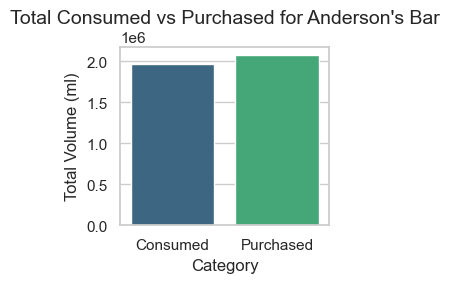

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create data for plotting
totals = {'Consumed': total_consumed, 'Purchased': total_purchased}

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(3,3))
sns.barplot(x=list(totals.keys()), y=list(totals.values()), palette="viridis")

plt.title("Total Consumed vs Purchased for Anderson's Bar", fontsize=14)
plt.ylabel("Total Volume (ml)", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.show()

In [16]:
#Alcohol type consumption (total sum)
alcohol_type_consumption = df.groupby('Alcohol Type')['Consumed (ml)'].sum().sort_values(ascending=False)
print(alcohol_type_consumption)

# mostly we dont have much differences but vodka consumpiton in on the top.

Alcohol Type
Vodka      411759.71
Beer       399498.39
Rum        393266.84
Whiskey    384754.46
Wine       379402.26
Name: Consumed (ml), dtype: float64


C:\Users\peer1\AppData\Local\Temp\ipykernel_18728\2766538407.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alcohol_type_consumption.values,


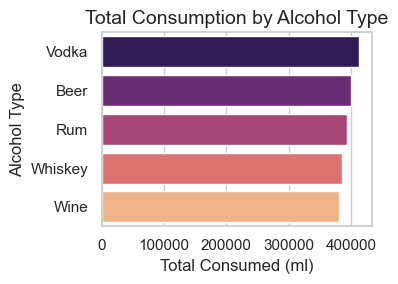

In [17]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(4, 3))
sns.barplot(x=alcohol_type_consumption.values,
            y=alcohol_type_consumption.index,
            palette="magma")

plt.title("Total Consumption by Alcohol Type", fontsize=14)
plt.xlabel("Total Consumed (ml)", fontsize=12)
plt.ylabel("Alcohol Type", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.show()

In [18]:
#Brand consumption + Fast & Slow movers
brand_consumption = df.groupby('Brand Name')['Consumed (ml)'].sum().sort_values(ascending=False)
brand_average = brand_consumption.mean()
fast_movers = brand_consumption[brand_consumption > brand_average]
slow_movers = brand_consumption[brand_consumption <= brand_average]
print('brand',brand_consumption)
print('fastmovingbrands',fast_movers)
print('slowmovingbrands',slow_movers)

brand Brand Name
Grey Goose        158924.02
Jim Beam          139702.43
Captain Morgan    138035.53
Barefoot          132312.95
Yellow Tail       129843.65
Smirnoff          129176.67
Bacardi           127951.80
Malibu            127279.51
Jack Daniels      125050.89
Absolut           123659.02
Jameson           120001.14
Sutter Home       117245.66
Miller            107719.33
Coors              97999.32
Heineken           96967.09
Budweiser          96812.65
Name: Consumed (ml), dtype: float64
fastmovingbrands Brand Name
Grey Goose        158924.02
Jim Beam          139702.43
Captain Morgan    138035.53
Barefoot          132312.95
Yellow Tail       129843.65
Smirnoff          129176.67
Bacardi           127951.80
Malibu            127279.51
Jack Daniels      125050.89
Absolut           123659.02
Name: Consumed (ml), dtype: float64
slowmovingbrands Brand Name
Jameson        120001.14
Sutter Home    117245.66
Miller         107719.33
Coors           97999.32
Heineken        96967.09
Bu

C:\Users\peer1\AppData\Local\Temp\ipykernel_18728\1154804791.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fastmoving.values, y=fastmoving.index, palette="viridis", ax=axes[0])
C:\Users\peer1\AppData\Local\Temp\ipykernel_18728\1154804791.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=slowmoving.values, y=slowmoving.index, palette="magma", ax=axes[1])


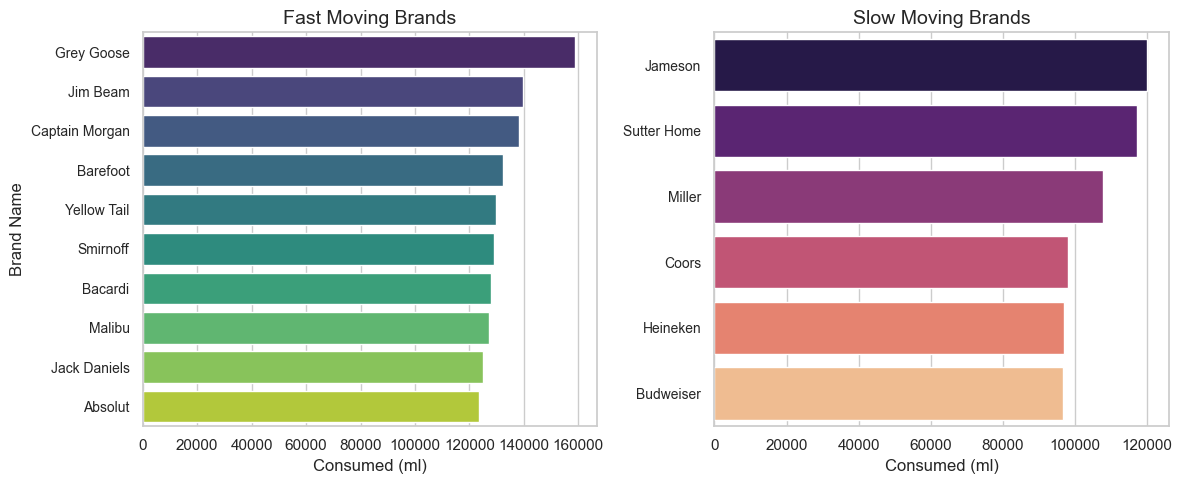

In [19]:
# Sort descending (for reverse order in plot)
fastmoving = fast_movers.sort_values(ascending=False)
slowmoving = slow_movers.sort_values(ascending=False)

# Set style
sns.set(style="whitegrid")

# Create subplots (2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Fast Movers
sns.barplot(x=fastmoving.values, y=fastmoving.index, palette="viridis", ax=axes[0])
axes[0].set_title("Fast Moving Brands", fontsize=14)
axes[0].set_xlabel("Consumed (ml)", fontsize=12)
axes[0].set_ylabel("Brand Name", fontsize=12)
axes[0].tick_params(axis='y', labelsize=10)

# Plot Slow Movers
sns.barplot(x=slowmoving.values, y=slowmoving.index, palette="magma", ax=axes[1])
axes[1].set_title("Slow Moving Brands", fontsize=14)
axes[1].set_xlabel("Consumed (ml)", fontsize=12)
axes[1].set_ylabel("")
axes[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

# Majority we have the fast moving items only . we have few slow moving items so we nedd to maintain that stock very low..

In [20]:
#Time-based aggregations
monthly_consumption = df.groupby('Month')['Consumed (ml)'].sum().reset_index()
monthly_brand_consumption =df.groupby(['Month', 'Brand Name'])['Consumed (ml)'].sum().reset_index()
dayofweek_consumption = df.groupby('Day_of_Week')['Consumed (ml)'].sum().reset_index()
weekly_consumption_yearly =df.groupby('Week')['Consumed (ml)'].sum().reset_index()
weekend_consumption = df.groupby('Weekend')['Consumed (ml)'].sum().reset_index()
monthly_weekend = df.groupby(['Month', 'Weekend'])['Consumed (ml)'].sum().reset_index()
monthly_balance = df.groupby('Month')[['Purchase (ml)', 'Consumed (ml)']].sum().reset_index()
daily_summary =df.groupby('Date')[['Purchase (ml)', 'Consumed (ml)']].sum().reset_index()


print(monthly_consumption)
print(monthly_brand_consumption)
print(dayofweek_consumption)
print(weekly_consumption_yearly)
print(weekend_consumption)
print(monthly_weekend)
print(monthly_balance)
print(daily_summary)


    Month  Consumed (ml)
0       1      190070.71
1       2      159822.30
2       3      158339.96
3       4      155860.16
4       5      170649.44
5       6      159086.67
6       7      167976.64
7       8      157453.30
8       9      155618.19
9      10      164376.69
10     11      165006.98
11     12      164420.62
     Month      Brand Name  Consumed (ml)
0        1         Absolut       12724.05
1        1         Bacardi       12087.70
2        1        Barefoot       13845.02
3        1       Budweiser        8802.51
4        1  Captain Morgan       14571.05
..     ...             ...            ...
187     12          Malibu       12031.76
188     12          Miller        4406.95
189     12        Smirnoff       12833.13
190     12     Sutter Home        7689.98
191     12     Yellow Tail       14111.62

[192 rows x 3 columns]
  Day_of_Week  Consumed (ml)
0      Friday      283676.29
1      Monday      270807.44
2    Saturday      281922.49
3      Sunday      282815.93
4 

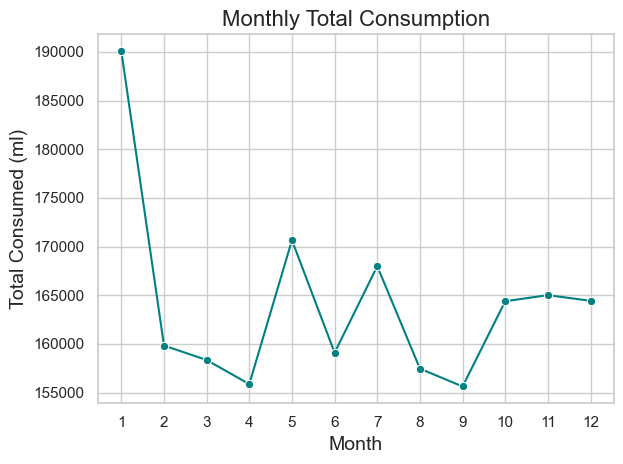

In [21]:
# Monthly Consumption
sns.lineplot(data=monthly_consumption, x='Month', y='Consumed (ml)', marker='o', color='teal')

plt.title("Monthly Total Consumption", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Consumed (ml)", fontsize=14)
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()
# we have the highest consumption inthe first month and its gradually decreasing.

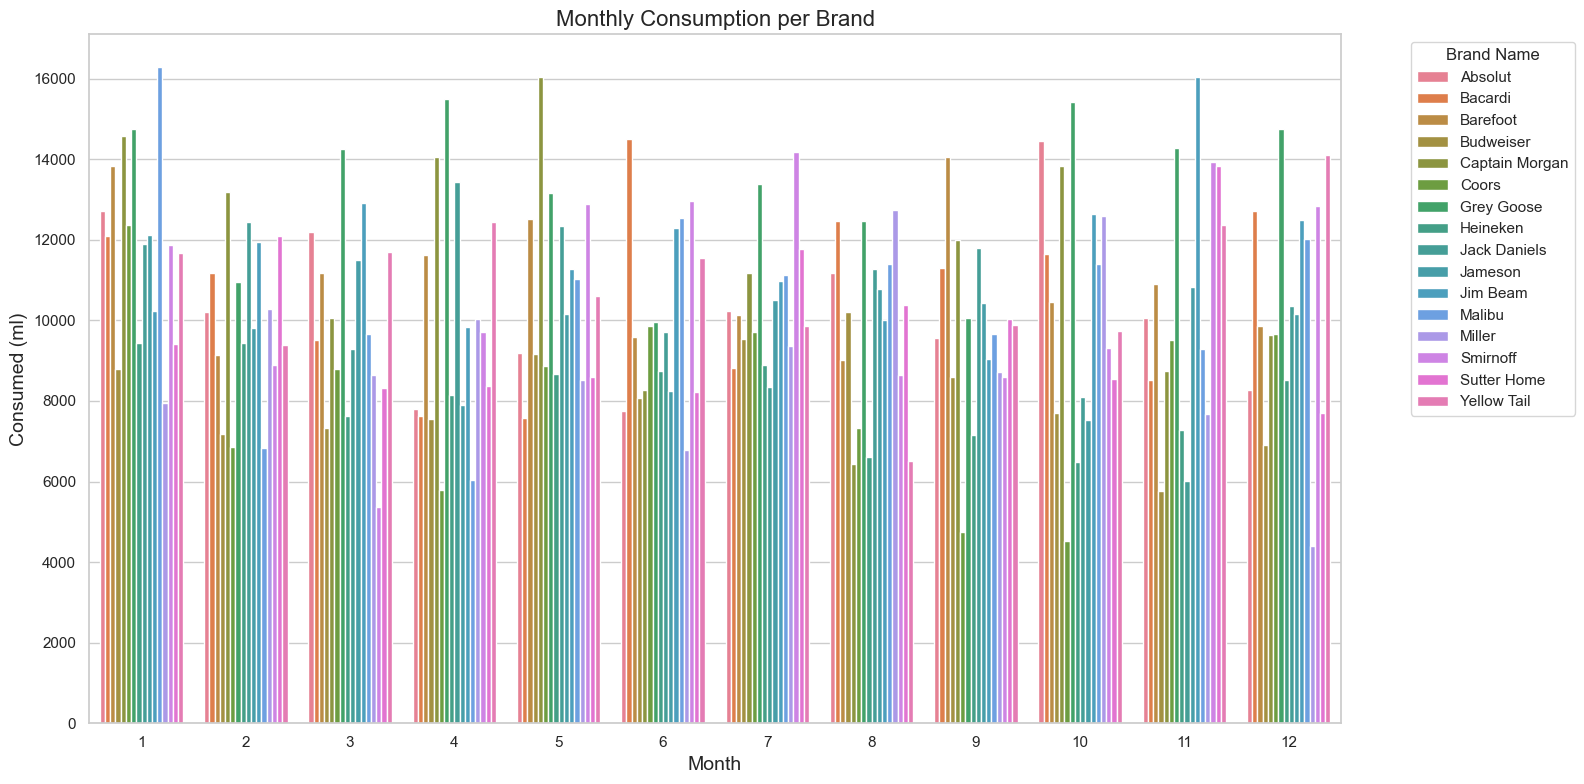

In [22]:
plt.figure(figsize=(16, 8))
sns.barplot(data=monthly_brand_consumption, x='Month', y='Consumed (ml)', hue='Brand Name')

plt.title('Monthly Consumption per Brand', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Consumed (ml)', fontsize=14)
plt.legend(title='Brand Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#Monthly brand consumption in anderson bar.

C:\Users\peer1\AppData\Local\Temp\ipykernel_18728\4144290941.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dayofweek_consumption, x='Day_of_Week', y='Consumed (ml)', palette='crest')


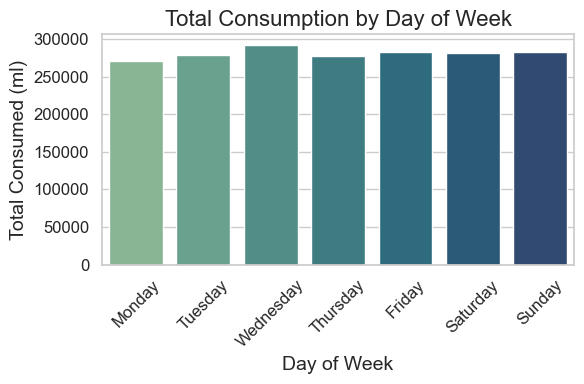

In [23]:
# Consumption day of the week.
# Sorting days to show proper week order
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek_consumption['Day_of_Week'] = pd.Categorical(dayofweek_consumption['Day_of_Week'], categories=order, ordered=True)
dayofweek_consumption = dayofweek_consumption.sort_values('Day_of_Week')

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=dayofweek_consumption, x='Day_of_Week', y='Consumed (ml)', palette='crest')

plt.title("Total Consumption by Day of Week", fontsize=16)
plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Total Consumed (ml)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# we can see the almost they consumption is same but on monday we have less in it.

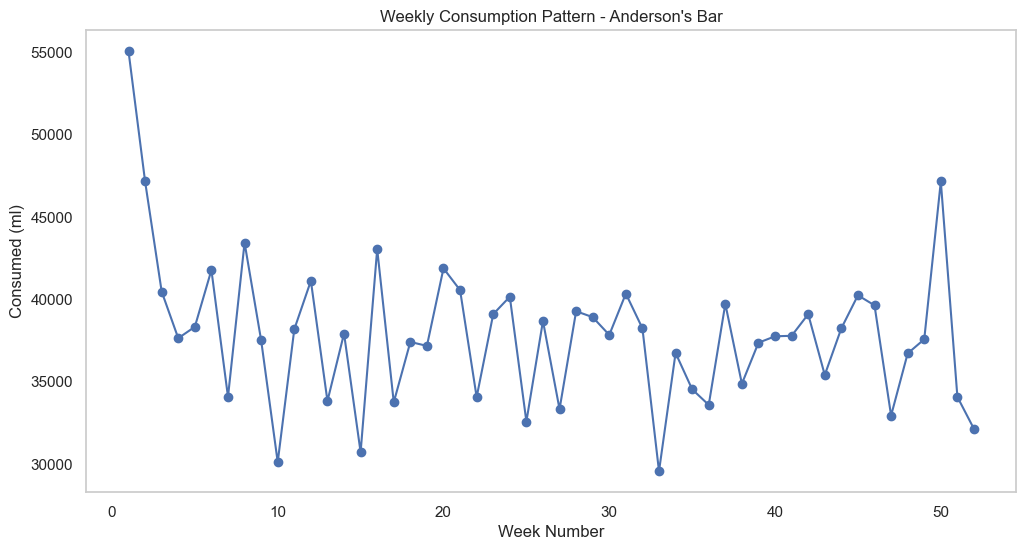

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_consumption_yearly['Week'], weekly_consumption_yearly['Consumed (ml)'], marker='o')
plt.title("Weekly Consumption Pattern - Anderson's Bar")
plt.xlabel("Week Number")
plt.ylabel("Consumed (ml)")
plt.grid()
plt.show()
#This trend show the weekly wise report through out the year .

C:\Users\peer1\AppData\Local\Temp\ipykernel_18728\2329239040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekend_consumption, x='Weekend', y='Consumed (ml)', palette='coolwarm')


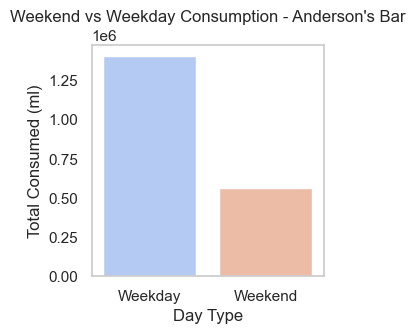

In [25]:
plt.figure(figsize=(3,3))
sns.barplot(data=weekend_consumption, x='Weekend', y='Consumed (ml)', palette='coolwarm')

plt.title("Weekend vs Weekday Consumption - Anderson's Bar")
plt.xlabel("Day Type")
plt.ylabel("Total Consumed (ml)")
plt.grid(axis='y')
plt.show()
# we can see the consumption in more in weekday compared to the weekend

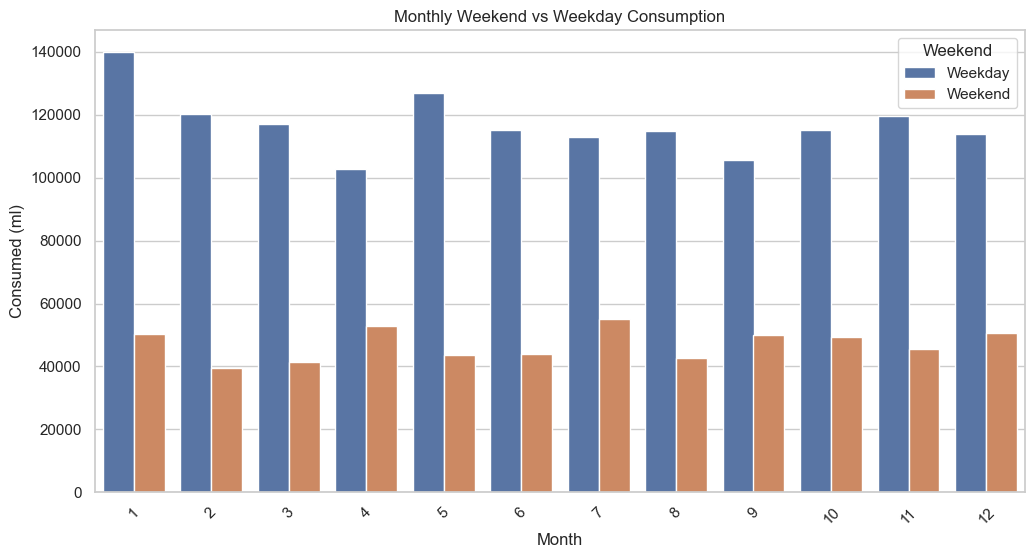

In [26]:

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_weekend, x='Month', y='Consumed (ml)', hue='Weekend')
plt.title("Monthly Weekend vs Weekday Consumption")
plt.xticks(rotation=45)
plt.show()
# seeing the in the month of the year  difference between weekends and weekdays.

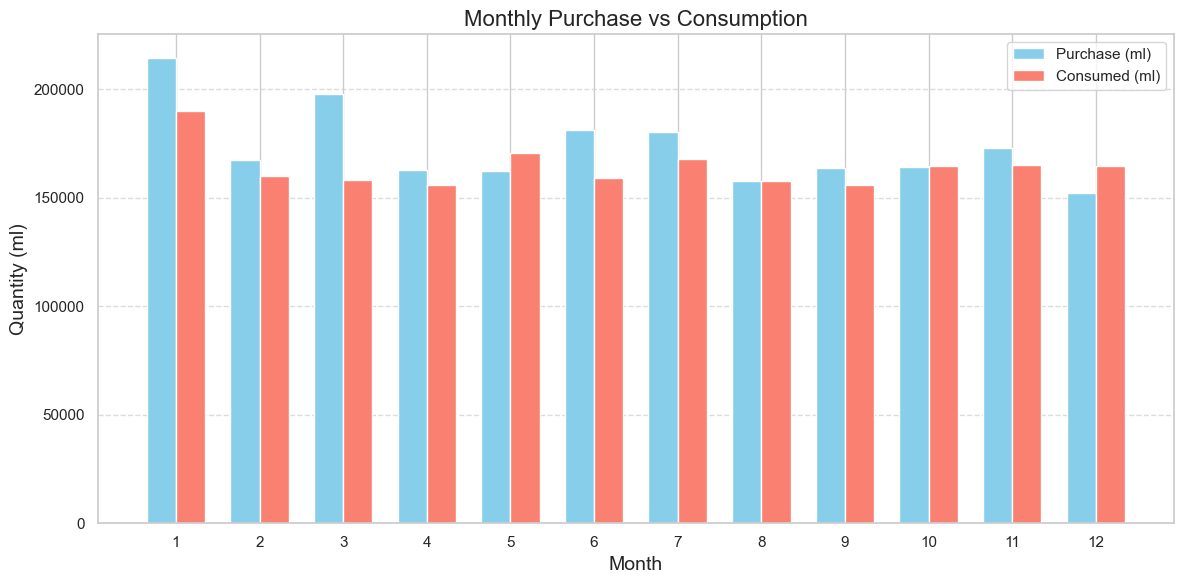

In [27]:
import numpy as np

months = monthly_balance['Month']
purchase = monthly_balance['Purchase (ml)']
consumed = monthly_balance['Consumed (ml)']

# Bar width and positions
bar_width = 0.35
x = np.arange(len(months))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, purchase, bar_width, label='Purchase (ml)', color='skyblue')
plt.bar(x + bar_width/2, consumed, bar_width, label='Consumed (ml)', color='salmon')

plt.title('Monthly Purchase vs Consumption', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Quantity (ml)', fontsize=14)
plt.xticks(x, months)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# we can see the mothly wise how much we purchaed and comsumped in it..

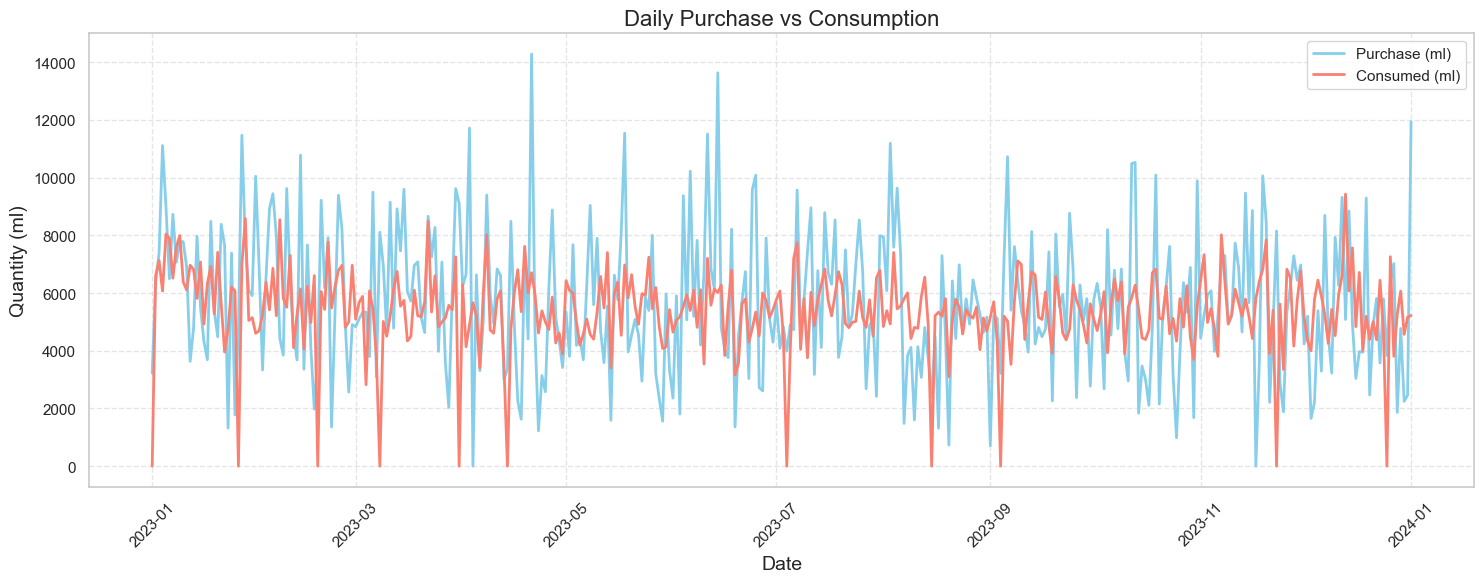

In [28]:

plt.figure(figsize=(15, 6))

# Plot Purchase
plt.plot(daily_summary['Date'], daily_summary['Purchase (ml)'], label='Purchase (ml)', color='skyblue', linewidth=2)

# Plot Consumption
plt.plot(daily_summary['Date'], daily_summary['Consumed (ml)'], label='Consumed (ml)', color='salmon', linewidth=2)

plt.title('Daily Purchase vs Consumption', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Quantity (ml)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# This is the summary of the purchase and consumption
#so came to consulsion that we are consumption is more rather than purchases.


In [29]:
# Fixing the  Thresholds for total consumption
#Taking the average as month  because taking the single day we are getting very low value because it have lot of 0 in it
monthly_series = df.groupby('Month')['Consumed (ml)'].sum()
avg_monthly_consumption = monthly_series.mean()
stockout_threshold = avg_monthly_consumption * 0.5
overstock_threshold = avg_monthly_consumption * 1.2
print("Average Monthly Consumption:", avg_monthly_consumption)
print("Stockout Threshold:", stockout_threshold)
print("Overstock Threshold:", overstock_threshold)

# we are fixing stockout threshold value as 50% more for the average values
# we are fixing the overstock threshold values as 150% more for the overstock values.


Average Monthly Consumption: 164056.80499999996
Stockout Threshold: 82028.40249999998
Overstock Threshold: 196868.16599999994


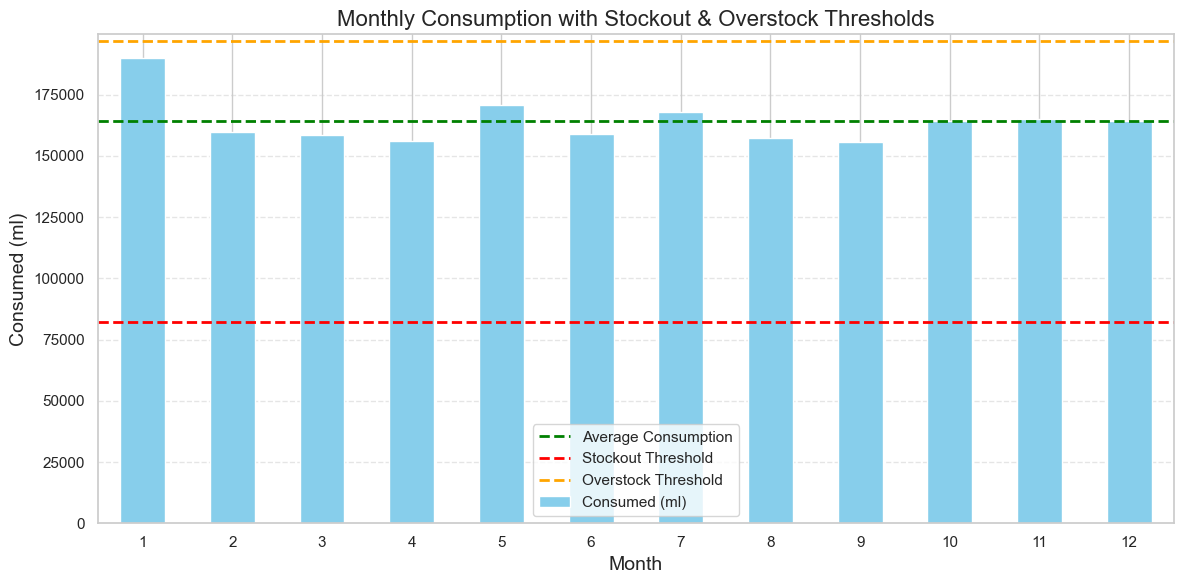

In [30]:

plt.figure(figsize=(12, 6))

# Bar plot for monthly consumption
monthly_series.plot(kind='bar', color='skyblue')

# Plot thresholds
plt.axhline(y=avg_monthly_consumption, color='green', linestyle='--', linewidth=2, label='Average Consumption')
plt.axhline(y=stockout_threshold, color='red', linestyle='--', linewidth=2, label='Stockout Threshold')
plt.axhline(y=overstock_threshold, color='orange', linestyle='--', linewidth=2, label='Overstock Threshold')

plt.title('Monthly Consumption with Stockout & Overstock Thresholds', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Consumed (ml)', fontsize=14)
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# By these values only we  will adjust our stock in the bars.
# see that no stock is not out.
# they are not sold in the bars which leads to the loss to the bars.

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

analysis_result = {} # Initialize analysis_result as an empty dictionary

monthly_series = monthly_series.reset_index().set_index('Month')
if len(monthly_series) >= 6:
   result = seasonal_decompose(monthly_series['Consumed (ml)'], model='additive', period=6)
   analysis_result['Seasonality Decomposition'] = result
else:
   analysis_result['Seasonality Decomposition'] = None

print(analysis_result)

{'Seasonality Decomposition': <statsmodels.tsa.seasonal.DecomposeResult object at 0x000001BB9C9D7B60>}


In [32]:
if analysis_result['Seasonality Decomposition'] is not None:
    result = analysis_result['Seasonality Decomposition']

    print("Observed values:")
    print(result.observed)

    print("\nTrend values:")
    print(result.trend)

    print("\nSeasonal values:")
    print(result.seasonal)

    print("\nResidual values:")
    print(result.resid)
else:
    print("Decomposition could not be performed due to insufficient data.")


Observed values:
Month
1     190070.71
2     159822.30
3     158339.96
4     155860.16
5     170649.44
6     159086.67
7     167976.64
8     157453.30
9     155618.19
10    164376.69
11    165006.98
12    164420.62
Name: Consumed (ml), dtype: float64

Trend values:
Month
1               NaN
2               NaN
3               NaN
4     163797.034167
5     161758.445000
6     161334.214167
7     161817.110833
8     162056.616667
9     162030.907500
10              NaN
11              NaN
12              NaN
Name: trend, dtype: float64

Seasonal values:
Month
1     7184.517222
2    -3578.328611
3    -5387.729444
4    -6911.886111
5     9915.983056
6    -1222.556111
7     7184.517222
8    -3578.328611
9    -5387.729444
10   -6911.886111
11    9915.983056
12   -1222.556111
Name: seasonal, dtype: float64

Residual values:
Month
1             NaN
2             NaN
3             NaN
4    -1024.988056
5    -1024.988056
6    -1024.988056
7    -1024.988056
8    -1024.988056
9    -1024.988056
10 

<Figure size 1200x800 with 0 Axes>

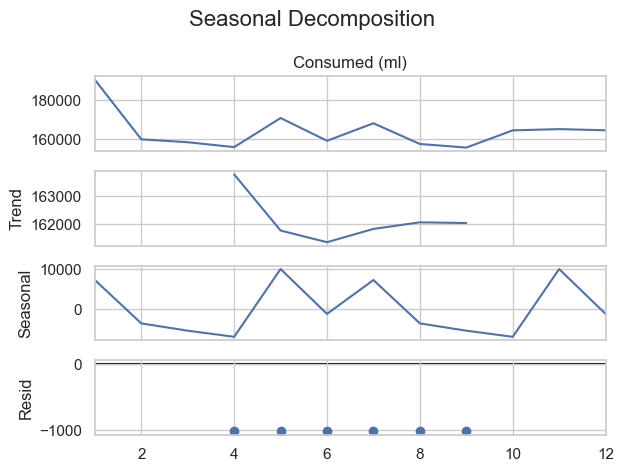

In [33]:
# Since you already have the result:
if analysis_result['Seasonality Decomposition'] is not None:
    result = analysis_result['Seasonality Decomposition']

    # Plot all components
    plt.figure(figsize=(12, 8))
    result.plot()
    plt.suptitle('Seasonal Decomposition', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data to perform decomposition.")

  # Seasonal analysis means
  #  Trend:The long-term increase or decrease in consumption (e.g., over the year, people might drink more or less overall)
  #  Seasonality: The repeating patterns that happen regularly — like higher alcohol sales in December (Christmas/New Year), or summer vs winter demand.
  #  Residual (Noise): Random ups and downs that don't follow any clear trend or seasonality — like one-off events, promotions, or weather changes.
  #  Observed:  This is simply the raw data you have.

In [34]:
seasonal_consumption = df.groupby(['Season', 'Alcohol Type', 'Brand Name'])['Consumed (ml)'].sum().reset_index()
season_pivot = seasonal_consumption.pivot_table(
        values='Consumed (ml)',
        index=['Alcohol Type', 'Brand Name'],
        columns='Season',
        fill_value=0
    )
analysis_result['Standby Season-Wise'] = season_pivot

print(season_pivot)

# NOW we can see the season wise consumption
#Note: Vizualtion in not required for this.

Season                           Fall    Spring    Summer    Winter
Alcohol Type Brand Name                                            
Beer         Budweiser       22054.89  24059.29  27800.75  22897.72
             Coors           18783.97  23439.58  26879.05  28896.72
             Heineken        20912.28  24431.28  24237.30  27386.23
             Miller          29002.59  27197.64  28880.53  22638.57
Rum          Bacardi         31461.29  24728.08  35782.09  35980.34
             Captain Morgan  34578.74  40170.97  25905.22  37380.60
             Malibu          30325.70  26741.79  35068.93  35143.09
Vodka        Absolut         34062.22  29213.26  29177.06  31206.48
             Grey Goose      39746.02  42896.72  35818.28  40463.00
             Smirnoff        31836.58  27976.92  35775.53  33587.64
Whiskey      Jack Daniels    25918.22  35070.45  29344.76  34717.46
             Jameson         28791.86  29568.29  29535.31  32105.68
             Jim Beam        37710.10  34018.02 

In [35]:
 # 8. Alcohol Type Monthly Averages
alcohol_monthly = df.groupby(['Month', 'Alcohol Type'])['Consumed (ml)'].sum().reset_index()
alcohol_type_avg = alcohol_monthly.groupby('Alcohol Type')['Consumed (ml)'].mean().reset_index()
analysis_result['Alcohol Type Monthly Average'] = alcohol_type_avg
print(alcohol_monthly)
print(alcohol_type_avg)

    Month Alcohol Type  Consumed (ml)
0       1         Beer       38562.24
1       1          Rum       42944.06
2       1        Vodka       39344.21
3       1      Whiskey       34270.36
4       1         Wine       34949.84
5       2         Beer       33760.23
6       2          Rum       31185.18
7       2        Vodka       30058.42
8       2      Whiskey       34208.68
9       2         Wine       30609.79
10      3         Beer       32378.35
11      3          Rum       29257.57
12      3        Vodka       31820.49
13      3      Whiskey       33691.98
14      3         Wine       31191.57
15      4         Beer       31533.90
16      4          Rum       27718.65
17      4        Vodka       33014.48
18      4      Whiskey       31167.80
19      4         Wine       32425.33
20      5         Beer       35215.54
21      5          Rum       34664.62
22      5        Vodka       35251.93
23      5      Whiskey       33796.98
24      5         Wine       31720.37
25      6   

In [36]:
# Alcohol Type Thresholds
alcohol_type_avg['Stockout Threshold'] = alcohol_type_avg['Consumed (ml)'] * 0.5
alcohol_type_avg['Overstock Threshold'] = alcohol_type_avg['Consumed (ml)'] * 1.2
analysis_result['Alcohol Type Thresholds'] = alcohol_type_avg
# In this we are fixing  threeshold values to alcohol types

In [37]:
# this is the daily analysis of the alcohol  wise and brand wise
daily_brand_alcohol = df.groupby(['Date', 'Alcohol Type', 'Brand Name'])['Consumed (ml)'].sum().reset_index()
analysis_result['Daily Brand Alcohol Consumption'] = daily_brand_alcohol

print(analysis_result)

{'Seasonality Decomposition': <statsmodels.tsa.seasonal.DecomposeResult object at 0x000001BB9C9D7B60>, 'Standby Season-Wise': Season                           Fall    Spring    Summer    Winter
Alcohol Type Brand Name                                            
Beer         Budweiser       22054.89  24059.29  27800.75  22897.72
             Coors           18783.97  23439.58  26879.05  28896.72
             Heineken        20912.28  24431.28  24237.30  27386.23
             Miller          29002.59  27197.64  28880.53  22638.57
Rum          Bacardi         31461.29  24728.08  35782.09  35980.34
             Captain Morgan  34578.74  40170.97  25905.22  37380.60
             Malibu          30325.70  26741.79  35068.93  35143.09
Vodka        Absolut         34062.22  29213.26  29177.06  31206.48
             Grey Goose      39746.02  42896.72  35818.28  40463.00
             Smirnoff        31836.58  27976.92  35775.53  33587.64
Whiskey      Jack Daniels    25918.22  35070.45  29344.76 

## Analysis Summary and Optimizer Preparation

We have completed the analysis of the Anderson's bar, and the extracted values are now being utilized to build the optimizer.

## Challenge in Manual Extraction

However, manually identifying each bar and extracting the corresponding values can be challenging and time-consuming.

## Solution: Automated Function

To address this issue, we developed a function that encapsulates the entire analysis process, storing the results corresponding to each bar by its name for easy access.


## Function Development to Extract Individual Bar Data ##

In [38]:
#created function to collect the analysis in the all bars .
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Updated analyze_bar_main including 'Daily Brand Alcohol Consumption'
def analyze_bar_main(df, bar_name):
    # Filter data for selected bar
    bar_df = df[df['Bar Name'] == bar_name].copy()

    analysis_result = {}

    # 1. Total consumption and purchase
    total_consumed = bar_df['Consumed (ml)'].sum()
    total_purchased = bar_df['Purchase (ml)'].sum()
    analysis_result['Total Consumed (ml)'] = total_consumed
    analysis_result['Total Purchased (ml)'] = total_purchased

    # 2. Alcohol type consumption (total sum)
    alcohol_type_consumption = bar_df.groupby('Alcohol Type')['Consumed (ml)']\
        .sum().sort_values(ascending=False)
    analysis_result['Alcohol Type Consumption'] = alcohol_type_consumption

    # 3. Brand consumption + Fast & Slow movers
    brand_consumption = bar_df.groupby('Brand Name')['Consumed (ml)']\
        .sum().sort_values(ascending=False)
    brand_average = brand_consumption.mean()
    fast_movers = brand_consumption[brand_consumption > brand_average]
    slow_movers = brand_consumption[brand_consumption <= brand_average]
    analysis_result['Brand Consumption'] = brand_consumption
    analysis_result['Fast Movers'] = fast_movers
    analysis_result['Slow Movers'] = slow_movers

    # 4. Time-based aggregations
    monthly_consumption = bar_df.groupby('Month')['Consumed (ml)'].sum().reset_index()
    monthly_brand_consumption = bar_df.groupby(['Month', 'Brand Name'])['Consumed (ml)']\
        .sum().reset_index()
    dayofweek_consumption = bar_df.groupby('Day_of_Week')['Consumed (ml)']\
        .sum().reset_index()
    weekly_consumption_yearly = bar_df.groupby('Week')['Consumed (ml)']\
        .sum().reset_index()
    weekend_consumption = bar_df.groupby('Weekend')['Consumed (ml)']\
        .sum().reset_index()
    monthly_weekend = bar_df.groupby(['Month', 'Weekend'])['Consumed (ml)']\
        .sum().reset_index()
    monthly_balance = bar_df.groupby('Month')[['Purchase (ml)', 'Consumed (ml)']]\
        .sum().reset_index()
    daily_summary = bar_df.groupby('Date')[['Purchase (ml)', 'Consumed (ml)']]\
        .sum().reset_index()
    analysis_result['Monthly Consumption'] = monthly_consumption
    analysis_result['Monthly Brand Consumption'] = monthly_brand_consumption
    analysis_result['Day Of Week Consumption'] = dayofweek_consumption
    analysis_result['Weekly Consumption Yearly'] = weekly_consumption_yearly
    analysis_result['Weekend Consumption'] = weekend_consumption
    analysis_result['Monthly Weekend'] = monthly_weekend
    analysis_result['Monthly Balance'] = monthly_balance
    analysis_result['Daily Summary'] = daily_summary

    # 5. Thresholds for total consumption
    monthly_series = bar_df.groupby('Month')['Consumed (ml)'].sum()
    avg_monthly_consumption = monthly_series.mean()
    stockout_threshold = avg_monthly_consumption * 0.5
    overstock_threshold = avg_monthly_consumption * 1.2
    analysis_result['Avg Monthly Consumption'] = avg_monthly_consumption
    analysis_result['Stockout Threshold'] = stockout_threshold
    analysis_result['Overstock Threshold'] = overstock_threshold

    # 6. Seasonality Decomposition
    monthly_series = monthly_series.reset_index().set_index('Month')
    if len(monthly_series) >= 6:
        result = seasonal_decompose(monthly_series['Consumed (ml)'], model='additive', period=6)
        analysis_result['Seasonality Decomposition'] = result
    else:
        analysis_result['Seasonality Decomposition'] = None

    # 7. Season-Wise Analysis
    seasonal_consumption = bar_df.groupby(['Season', 'Alcohol Type', 'Brand Name'])['Consumed (ml)']\
        .sum().reset_index()
    season_pivot = seasonal_consumption.pivot_table(
        values='Consumed (ml)',
        index=['Alcohol Type', 'Brand Name'],
        columns='Season',
        fill_value=0
    )
    analysis_result['Standby Season-Wise'] = season_pivot

    # 8. Alcohol Type Monthly Averages
    alcohol_monthly = bar_df.groupby(['Month', 'Alcohol Type'])['Consumed (ml)']\
        .sum().reset_index()
    alcohol_type_avg = alcohol_monthly.groupby('Alcohol Type')['Consumed (ml)']\
        .mean().reset_index()
    analysis_result['Alcohol Type Monthly Average'] = alcohol_type_avg

    # 9. Alcohol Type Thresholds
    alcohol_type_avg['Stockout Threshold'] = alcohol_type_avg['Consumed (ml)'] * 0.5
    alcohol_type_avg['Overstock Threshold'] = alcohol_type_avg['Consumed (ml)'] * 1.2
    analysis_result['Alcohol Type Thresholds'] = alcohol_type_avg

    # — NEW: Daily brand-alcohol consumption as DataFrame
    daily_brand_alcohol = bar_df.groupby(['Date', 'Alcohol Type', 'Brand Name'])['Consumed (ml)']\
        .sum().reset_index()
    analysis_result['Daily Brand Alcohol Consumption'] = daily_brand_alcohol

    return analysis_result


### Now we will pass the different bars to this function to analyse the patterns of that bar to pass to the optimizer ###

In [39]:
# Analyze Anderson's bar
# Run the analysis
andersonsbar_analysis= analyze_bar_main(df, "Anderson's Bar")

# 1️⃣ Print only keys
print("===== KEYS =====")
for key in andersonsbar_analysis.keys():
    print(key)

# 2️⃣ Print keys + values
print("\n===== KEYS + VALUES =====")
for key, value in andersonsbar_analysis.items():
    print(f"\nKey: {key}")
    print("Value:")
    print(value)

===== KEYS =====
Total Consumed (ml)
Total Purchased (ml)
Alcohol Type Consumption
Brand Consumption
Fast Movers
Slow Movers
Monthly Consumption
Monthly Brand Consumption
Day Of Week Consumption
Weekly Consumption Yearly
Weekend Consumption
Monthly Weekend
Monthly Balance
Daily Summary
Avg Monthly Consumption
Stockout Threshold
Overstock Threshold
Seasonality Decomposition
Standby Season-Wise
Alcohol Type Monthly Average
Alcohol Type Thresholds
Daily Brand Alcohol Consumption

===== KEYS + VALUES =====

Key: Total Consumed (ml)
Value:
335818.94999999995

Key: Total Purchased (ml)
Value:
354200.71

Key: Alcohol Type Consumption
Value:
Alcohol Type
Whiskey    70459.96
Wine       69565.40
Beer       67135.59
Rum        66628.06
Vodka      62029.94
Name: Consumed (ml), dtype: float64

Key: Brand Consumption
Value:
Brand Name
Captain Morgan    27066.83
Barefoot          26989.63
Bacardi           25966.47
Jim Beam          25888.54
Smirnoff          24889.67
Grey Goose        24026.36
James

In [40]:
# Analyze Brown"s Bar
# Run the analysis
BrownsBar_analysis= analyze_bar_main(df, "Brown's Bar")

# 1️⃣ Print only keys
print("===== KEYS =====")
for key in BrownsBar_analysis.keys():
    print(key)

# 2️⃣ Print keys + values
print("\n===== KEYS + VALUES =====")
for key, value in BrownsBar_analysis.items():
    print(f"\nKey: {key}")
    print("Value:")
    print(value)

===== KEYS =====
Total Consumed (ml)
Total Purchased (ml)
Alcohol Type Consumption
Brand Consumption
Fast Movers
Slow Movers
Monthly Consumption
Monthly Brand Consumption
Day Of Week Consumption
Weekly Consumption Yearly
Weekend Consumption
Monthly Weekend
Monthly Balance
Daily Summary
Avg Monthly Consumption
Stockout Threshold
Overstock Threshold
Seasonality Decomposition
Standby Season-Wise
Alcohol Type Monthly Average
Alcohol Type Thresholds
Daily Brand Alcohol Consumption

===== KEYS + VALUES =====

Key: Total Consumed (ml)
Value:
326371.92

Key: Total Purchased (ml)
Value:
333319.08999999997

Key: Alcohol Type Consumption
Value:
Alcohol Type
Wine       69469.77
Beer       66743.84
Whiskey    66459.07
Vodka      63333.82
Rum        60365.42
Name: Consumed (ml), dtype: float64

Key: Brand Consumption
Value:
Brand Name
Yellow Tail       29588.63
Grey Goose        27873.30
Jameson           23813.13
Jim Beam          23777.58
Bacardi           23420.89
Sutter Home       20634.92
Heine

In [41]:
# Analyze Johnsonbar
# Run the analysis
Johnsonbar_analysis= analyze_bar_main(df, "Johnson's Bar")

# 1️⃣ Print only keys
print("===== KEYS =====")
for key in Johnsonbar_analysis.keys():
    print(key)

# 2️⃣ Print keys + values
print("\n===== KEYS + VALUES =====")
for key, value in Johnsonbar_analysis.items():
    print(f"\nKey: {key}")
    print("Value:")
    print(value)

===== KEYS =====
Total Consumed (ml)
Total Purchased (ml)
Alcohol Type Consumption
Brand Consumption
Fast Movers
Slow Movers
Monthly Consumption
Monthly Brand Consumption
Day Of Week Consumption
Weekly Consumption Yearly
Weekend Consumption
Monthly Weekend
Monthly Balance
Daily Summary
Avg Monthly Consumption
Stockout Threshold
Overstock Threshold
Seasonality Decomposition
Standby Season-Wise
Alcohol Type Monthly Average
Alcohol Type Thresholds
Daily Brand Alcohol Consumption

===== KEYS + VALUES =====

Key: Total Consumed (ml)
Value:
344184.38

Key: Total Purchased (ml)
Value:
364020.62

Key: Alcohol Type Consumption
Value:
Alcohol Type
Vodka      77030.94
Beer       74739.28
Rum        73387.74
Wine       65733.94
Whiskey    53292.48
Name: Consumed (ml), dtype: float64

Key: Brand Consumption
Value:
Brand Name
Captain Morgan    28319.66
Malibu            26356.51
Absolut           26070.31
Smirnoff          25506.02
Grey Goose        25454.61
Barefoot          22087.13
Sutter Home   

In [42]:
# Analyze Smithsbar
# Run the analysis
SmithsBar_analysis= analyze_bar_main(df, "Smith's Bar")

# 1️⃣ Print only keys
print("===== KEYS =====")
for key in Johnsonbar_analysis.keys():
    print(key)

# 2️⃣ Print keys + values
print("\n===== KEYS + VALUES =====")
for key, value in Johnsonbar_analysis.items():
    print(f"\nKey: {key}")
    print("Value:")
    print(value)

===== KEYS =====
Total Consumed (ml)
Total Purchased (ml)
Alcohol Type Consumption
Brand Consumption
Fast Movers
Slow Movers
Monthly Consumption
Monthly Brand Consumption
Day Of Week Consumption
Weekly Consumption Yearly
Weekend Consumption
Monthly Weekend
Monthly Balance
Daily Summary
Avg Monthly Consumption
Stockout Threshold
Overstock Threshold
Seasonality Decomposition
Standby Season-Wise
Alcohol Type Monthly Average
Alcohol Type Thresholds
Daily Brand Alcohol Consumption

===== KEYS + VALUES =====

Key: Total Consumed (ml)
Value:
344184.38

Key: Total Purchased (ml)
Value:
364020.62

Key: Alcohol Type Consumption
Value:
Alcohol Type
Vodka      77030.94
Beer       74739.28
Rum        73387.74
Wine       65733.94
Whiskey    53292.48
Name: Consumed (ml), dtype: float64

Key: Brand Consumption
Value:
Brand Name
Captain Morgan    28319.66
Malibu            26356.51
Absolut           26070.31
Smirnoff          25506.02
Grey Goose        25454.61
Barefoot          22087.13
Sutter Home   

In [43]:
# Analyze TaylorsBar
# Run the analysis
TaylorsBar_analysis= analyze_bar_main(df, "Taylor's Bar")

# 1️⃣ Print only keys
print("===== KEYS =====")
for key in TaylorsBar_analysis.keys():
    print(key)

# 2️⃣ Print keys + values
print("\n===== KEYS + VALUES =====")
for key, value in TaylorsBar_analysis.items():
    print(f"\nKey: {key}")
    print("Value:")
    print(value)

===== KEYS =====
Total Consumed (ml)
Total Purchased (ml)
Alcohol Type Consumption
Brand Consumption
Fast Movers
Slow Movers
Monthly Consumption
Monthly Brand Consumption
Day Of Week Consumption
Weekly Consumption Yearly
Weekend Consumption
Monthly Weekend
Monthly Balance
Daily Summary
Avg Monthly Consumption
Stockout Threshold
Overstock Threshold
Seasonality Decomposition
Standby Season-Wise
Alcohol Type Monthly Average
Alcohol Type Thresholds
Daily Brand Alcohol Consumption

===== KEYS + VALUES =====

Key: Total Consumed (ml)
Value:
315176.56

Key: Total Purchased (ml)
Value:
343762.47

Key: Alcohol Type Consumption
Value:
Alcohol Type
Vodka      69766.61
Whiskey    68906.96
Rum        61383.12
Beer       61026.88
Wine       54092.99
Name: Consumed (ml), dtype: float64

Key: Brand Consumption
Value:
Brand Name
Grey Goose        28017.89
Jim Beam          24368.84
Smirnoff          23242.64
Jack Daniels      23096.93
Captain Morgan    22766.61
Malibu            22042.69
Budweiser     

In [44]:
# Analyze TaylorsBar
# Run the analysis
ThomasBar_analysis= analyze_bar_main(df, "Thomas's Bar")

# 1️⃣ Print only keys
print("===== KEYS =====")
for key in ThomasBar_analysis.keys():
    print(key)

# 2️⃣ Print keys + values
print("\n===== KEYS + VALUES =====")
for key, value in ThomasBar_analysis.items():
    print(f"\nKey: {key}")
    print("Value:")
    print(value)

===== KEYS =====
Total Consumed (ml)
Total Purchased (ml)
Alcohol Type Consumption
Brand Consumption
Fast Movers
Slow Movers
Monthly Consumption
Monthly Brand Consumption
Day Of Week Consumption
Weekly Consumption Yearly
Weekend Consumption
Monthly Weekend
Monthly Balance
Daily Summary
Avg Monthly Consumption
Stockout Threshold
Overstock Threshold
Seasonality Decomposition
Standby Season-Wise
Alcohol Type Monthly Average
Alcohol Type Thresholds
Daily Brand Alcohol Consumption

===== KEYS + VALUES =====

Key: Total Consumed (ml)
Value:
318415.94

Key: Total Purchased (ml)
Value:
340526.43

Key: Alcohol Type Consumption
Value:
Alcohol Type
Vodka      70357.19
Rum        65716.76
Whiskey    65540.32
Beer       63412.01
Wine       53389.66
Name: Consumed (ml), dtype: float64

Key: Brand Consumption
Value:
Brand Name
Grey Goose        28510.30
Jim Beam          25158.15
Jack Daniels      24544.53
Bacardi           24164.80
Miller            21842.30
Malibu            21676.34
Smirnoff      

## ARIMA Optimizer Development

### AutoRegressive Integrated Moving Average (ARIMA)

ARIMA is a powerful time series forecasting model that combines three key components:
- **AR (AutoRegressive)**: Predicts future values based on past values.
- **I (Integrated)**: Uses differencing to make the time series stationary.
- **MA (Moving Average)**: Models the error of the prediction as a linear combination of past forecast errors.

This model is particularly effective for understanding and forecasting trends in time-dependent data, and it plays a crucial role in building our optimizer by modeling patterns in the bar data.


In [45]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

class BarInventoryForecastOptimizer:
    def __init__(self, bars_data, arima_order=(1,1,1), safety_buffer=0.3):
        """
        bars_data: either
          • { bar_name: DataFrame }
          • { bar_name: { ..., 'Daily Brand Alcohol Consumption': DataFrame, ... } }
        """
        self.bars_data = bars_data
        self.arima_order = arima_order
        self.safety_buffer = safety_buffer

    def _get_df(self, bar_name):
        if bar_name not in self.bars_data:
            raise KeyError(f"Bar '{bar_name}' not in bars_data keys {list(self.bars_data)}")
        val = self.bars_data[bar_name]
        # if it's a dict, extract the nested DataFrame:
        if isinstance(val, dict):
            if 'Daily Brand Alcohol Consumption' not in val:
                raise KeyError(f"Missing 'Daily Brand Alcohol Consumption' in bars_data['{bar_name}']")
            df = val['Daily Brand Alcohol Consumption']
        else:
            df = val
        if not isinstance(df, pd.DataFrame):
            raise TypeError(f"bars_data['{bar_name}'] is not a DataFrame or nested dict with one.")
        return df.copy()

    def forecast_for_single_day(self, bar_name, target_date):
        # 1) grab the correct DF
        df = self._get_df(bar_name)

        # 2) normalize date column
        if 'Date Time Served' in df.columns:
            df['Date'] = pd.to_datetime(df['Date Time Served'])
        elif 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
        else:
            raise KeyError("No 'Date' or 'Date Time Served' column found in DataFrame")

        last_date = df['Date'].max()
        td = pd.to_datetime(target_date)
        days = (td - last_date).days
        if days <= 0:
            raise ValueError(f"Target date {td.date()} must be after last data date {last_date.date()}")

        rows = []
        for (alc, brand), grp in df.groupby(['Alcohol Type','Brand Name']):
            ts = grp.set_index('Date')['Consumed (ml)'].asfreq('D').fillna(0)
            try:
                model = ARIMA(ts, order=self.arima_order).fit()
                fval = model.forecast(steps=days).iloc[-1]
                stock = round(fval * (1 + self.safety_buffer), 2)
            except Exception:
                fval = None
                stock = None
            rows.append({
                'Bar Name': bar_name,
                'Target Date': td.date(),
                'Alcohol Type': alc,
                'Brand Name': brand,
                'Forecasted Consumption (ml)': None if fval is None else round(fval, 2),
                'Stock to Maintain (ml)': stock
            })
        return pd.DataFrame(rows)

In [46]:
## seggrating the bars anlyzed data into the dataframe
bars_data = {
    "Anderson's Bar":   andersonsbar_analysis,
    "Brown's Bar":      BrownsBar_analysis,
    "Johnson's Bar":    Johnsonbar_analysis,
    "Smith's Bar":      SmithsBar_analysis,
    "Taylor's Bar":     TaylorsBar_analysis,
    "Thomas's Bar":     ThomasBar_analysis
}

In [47]:
## checking what vales it should accept
print("Available bars:", list(bars_data.keys()))

Available bars: ["Anderson's Bar", "Brown's Bar", "Johnson's Bar", "Smith's Bar", "Taylor's Bar", "Thomas's Bar"]


## Forecasting and Prediction ##

In [48]:
##Passing the vales in to the optimizers
optimizer = BarInventoryForecastOptimizer(bars_data)


In [49]:
# Predicting the future values to maintain the stock.
result = optimizer.forecast_for_single_day(
    bar_name="Anderson's Bar",
    target_date="2025-06-19"
)

for idx, row in result.iterrows():
    print(f"{row['Bar Name']} | {row['Target Date']} | {row['Alcohol Type']} | {row['Brand Name']} | Forecasted: {row['Forecasted Consumption (ml)']} ml | Stock to Maintain: {row['Stock to Maintain (ml)']} ml")

Anderson's Bar | 2025-06-19 | Beer | Budweiser | Forecasted: 3.68 ml | Stock to Maintain: 4.79 ml
Anderson's Bar | 2025-06-19 | Beer | Coors | Forecasted: 55.56 ml | Stock to Maintain: 72.23 ml
Anderson's Bar | 2025-06-19 | Beer | Heineken | Forecasted: 43.45 ml | Stock to Maintain: 56.48 ml
Anderson's Bar | 2025-06-19 | Beer | Miller | Forecasted: 50.09 ml | Stock to Maintain: 65.11 ml
Anderson's Bar | 2025-06-19 | Rum | Bacardi | Forecasted: 70.97 ml | Stock to Maintain: 92.26 ml
Anderson's Bar | 2025-06-19 | Rum | Captain Morgan | Forecasted: 79.53 ml | Stock to Maintain: 103.39 ml
Anderson's Bar | 2025-06-19 | Rum | Malibu | Forecasted: 12.57 ml | Stock to Maintain: 16.34 ml
Anderson's Bar | 2025-06-19 | Vodka | Absolut | Forecasted: 36.64 ml | Stock to Maintain: 47.64 ml
Anderson's Bar | 2025-06-19 | Vodka | Grey Goose | Forecasted: 48.4 ml | Stock to Maintain: 62.92 ml
Anderson's Bar | 2025-06-19 | Vodka | Smirnoff | Forecasted: 69.44 ml | Stock to Maintain: 90.27 ml
Anderson's B

In [55]:
result = optimizer.forecast_for_single_day(
    bar_name="Brown's Bar",
    target_date="2025-06-19"
)

for idx, row in result.iterrows():
    print(f"{row['Bar Name']} | {row['Target Date']} | {row['Alcohol Type']} | {row['Brand Name']} | Forecasted: {row['Forecasted Consumption (ml)']} ml | Stock to Maintain: {row['Stock to Maintain (ml)']} ml")

Brown's Bar | 2025-06-19 | Beer | Budweiser | Forecasted: 47.82 ml | Stock to Maintain: 62.17 ml
Brown's Bar | 2025-06-19 | Beer | Coors | Forecasted: 39.85 ml | Stock to Maintain: 51.81 ml
Brown's Bar | 2025-06-19 | Beer | Heineken | Forecasted: 46.53 ml | Stock to Maintain: 60.49 ml
Brown's Bar | 2025-06-19 | Beer | Miller | Forecasted: 47.58 ml | Stock to Maintain: 61.85 ml
Brown's Bar | 2025-06-19 | Rum | Bacardi | Forecasted: 64.91 ml | Stock to Maintain: 84.39 ml
Brown's Bar | 2025-06-19 | Rum | Captain Morgan | Forecasted: 50.3 ml | Stock to Maintain: 65.39 ml
Brown's Bar | 2025-06-19 | Rum | Malibu | Forecasted: 122.77 ml | Stock to Maintain: 159.6 ml
Brown's Bar | 2025-06-19 | Vodka | Absolut | Forecasted: 46.32 ml | Stock to Maintain: 60.21 ml
Brown's Bar | 2025-06-19 | Vodka | Grey Goose | Forecasted: 76.82 ml | Stock to Maintain: 99.86 ml
Brown's Bar | 2025-06-19 | Vodka | Smirnoff | Forecasted: 54.88 ml | Stock to Maintain: 71.34 ml
Brown's Bar | 2025-06-19 | Whiskey | Jac

In [56]:
result = optimizer.forecast_for_single_day(
    bar_name="Johnson's Bar",
    target_date="2025-06-19"
)
for idx, row in result.iterrows():
    print(f"{row['Bar Name']} | {row['Target Date']} | {row['Alcohol Type']} | {row['Brand Name']} | Forecasted: {row['Forecasted Consumption (ml)']} ml | Stock to Maintain: {row['Stock to Maintain (ml)']} ml")

Johnson's Bar | 2025-06-19 | Beer | Budweiser | Forecasted: 54.92 ml | Stock to Maintain: 71.39 ml
Johnson's Bar | 2025-06-19 | Beer | Coors | Forecasted: 53.39 ml | Stock to Maintain: 69.41 ml
Johnson's Bar | 2025-06-19 | Beer | Heineken | Forecasted: 54.5 ml | Stock to Maintain: 70.85 ml
Johnson's Bar | 2025-06-19 | Beer | Miller | Forecasted: 46.08 ml | Stock to Maintain: 59.9 ml
Johnson's Bar | 2025-06-19 | Rum | Bacardi | Forecasted: 56.98 ml | Stock to Maintain: 74.07 ml
Johnson's Bar | 2025-06-19 | Rum | Captain Morgan | Forecasted: 78.78 ml | Stock to Maintain: 102.41 ml
Johnson's Bar | 2025-06-19 | Rum | Malibu | Forecasted: 72.51 ml | Stock to Maintain: 94.26 ml
Johnson's Bar | 2025-06-19 | Vodka | Absolut | Forecasted: 76.22 ml | Stock to Maintain: 99.09 ml
Johnson's Bar | 2025-06-19 | Vodka | Grey Goose | Forecasted: 69.79 ml | Stock to Maintain: 90.73 ml
Johnson's Bar | 2025-06-19 | Vodka | Smirnoff | Forecasted: 71.56 ml | Stock to Maintain: 93.02 ml
Johnson's Bar | 2025-

In [57]:
result = optimizer.forecast_for_single_day(
    bar_name="Smith's Bar",
    target_date="2025-06-19"
)

for idx, row in result.iterrows():
    print(f"{row['Bar Name']} | {row['Target Date']} | {row['Alcohol Type']} | {row['Brand Name']} | Forecasted: {row['Forecasted Consumption (ml)']} ml | Stock to Maintain: {row['Stock to Maintain (ml)']} ml")

Smith's Bar | 2025-06-19 | Beer | Budweiser | Forecasted: 38.61 ml | Stock to Maintain: 50.19 ml
Smith's Bar | 2025-06-19 | Beer | Coors | Forecasted: 35.41 ml | Stock to Maintain: 46.03 ml
Smith's Bar | 2025-06-19 | Beer | Heineken | Forecasted: 48.17 ml | Stock to Maintain: 62.62 ml
Smith's Bar | 2025-06-19 | Beer | Miller | Forecasted: 57.76 ml | Stock to Maintain: 75.09 ml
Smith's Bar | 2025-06-19 | Rum | Bacardi | Forecasted: 54.0 ml | Stock to Maintain: 70.2 ml
Smith's Bar | 2025-06-19 | Rum | Captain Morgan | Forecasted: 51.54 ml | Stock to Maintain: 67.0 ml
Smith's Bar | 2025-06-19 | Rum | Malibu | Forecasted: 68.33 ml | Stock to Maintain: 88.84 ml
Smith's Bar | 2025-06-19 | Vodka | Absolut | Forecasted: 75.06 ml | Stock to Maintain: 97.57 ml
Smith's Bar | 2025-06-19 | Vodka | Grey Goose | Forecasted: 68.9 ml | Stock to Maintain: 89.58 ml
Smith's Bar | 2025-06-19 | Vodka | Smirnoff | Forecasted: 114.85 ml | Stock to Maintain: 149.31 ml
Smith's Bar | 2025-06-19 | Whiskey | Jack 

In [58]:
result = optimizer.forecast_for_single_day(
    bar_name="Taylor's Bar",
    target_date="2025-06-19"
)

for idx, row in result.iterrows():
    print(f"{row['Bar Name']} | {row['Target Date']} | {row['Alcohol Type']} | {row['Brand Name']} | Forecasted: {row['Forecasted Consumption (ml)']} ml | Stock to Maintain: {row['Stock to Maintain (ml)']} ml")

Taylor's Bar | 2025-06-19 | Beer | Budweiser | Forecasted: 42.76 ml | Stock to Maintain: 55.59 ml
Taylor's Bar | 2025-06-19 | Beer | Coors | Forecasted: 40.18 ml | Stock to Maintain: 52.24 ml
Taylor's Bar | 2025-06-19 | Beer | Heineken | Forecasted: 34.47 ml | Stock to Maintain: 44.82 ml
Taylor's Bar | 2025-06-19 | Beer | Miller | Forecasted: 40.23 ml | Stock to Maintain: 52.29 ml
Taylor's Bar | 2025-06-19 | Rum | Bacardi | Forecasted: 48.62 ml | Stock to Maintain: 63.21 ml
Taylor's Bar | 2025-06-19 | Rum | Captain Morgan | Forecasted: 58.79 ml | Stock to Maintain: 76.43 ml
Taylor's Bar | 2025-06-19 | Rum | Malibu | Forecasted: 114.68 ml | Stock to Maintain: 149.08 ml
Taylor's Bar | 2025-06-19 | Vodka | Absolut | Forecasted: 58.67 ml | Stock to Maintain: 76.28 ml
Taylor's Bar | 2025-06-19 | Vodka | Grey Goose | Forecasted: 88.84 ml | Stock to Maintain: 115.49 ml
Taylor's Bar | 2025-06-19 | Vodka | Smirnoff | Forecasted: 124.59 ml | Stock to Maintain: 161.96 ml
Taylor's Bar | 2025-06-19

In [59]:
result = optimizer.forecast_for_single_day(
    bar_name="Thomas's Bar",
    target_date="2025-06-19"
)

for idx, row in result.iterrows():
    print(f"{row['Bar Name']} | {row['Target Date']} | {row['Alcohol Type']} | {row['Brand Name']} | Forecasted: {row['Forecasted Consumption (ml)']} ml | Stock to Maintain: {row['Stock to Maintain (ml)']} ml")

Thomas's Bar | 2025-06-19 | Beer | Budweiser | Forecasted: 60.71 ml | Stock to Maintain: 78.92 ml
Thomas's Bar | 2025-06-19 | Beer | Coors | Forecasted: 37.04 ml | Stock to Maintain: 48.15 ml
Thomas's Bar | 2025-06-19 | Beer | Heineken | Forecasted: 36.64 ml | Stock to Maintain: 47.63 ml
Thomas's Bar | 2025-06-19 | Beer | Miller | Forecasted: 61.53 ml | Stock to Maintain: 79.99 ml
Thomas's Bar | 2025-06-19 | Rum | Bacardi | Forecasted: 66.66 ml | Stock to Maintain: 86.66 ml
Thomas's Bar | 2025-06-19 | Rum | Captain Morgan | Forecasted: 56.53 ml | Stock to Maintain: 73.49 ml
Thomas's Bar | 2025-06-19 | Rum | Malibu | Forecasted: 59.6 ml | Stock to Maintain: 77.47 ml
Thomas's Bar | 2025-06-19 | Vodka | Absolut | Forecasted: 56.83 ml | Stock to Maintain: 73.88 ml
Thomas's Bar | 2025-06-19 | Vodka | Grey Goose | Forecasted: 117.25 ml | Stock to Maintain: 152.43 ml
Thomas's Bar | 2025-06-19 | Vodka | Smirnoff | Forecasted: 65.53 ml | Stock to Maintain: 85.19 ml
Thomas's Bar | 2025-06-19 | W

## Simulations

### Anderson’s Bar
- **High-Demand Items**: 
  - Captain Morgan rum (79.53 ml, stock: 103.39 ml)
  - Barefoot wine (74.72 ml, stock: 97.14 ml)
  - Jim Beam whiskey (71.57 ml, stock: 93.05 ml)
- **Low-Demand Items**: 
  - Budweiser beer (3.68 ml, stock: 4.79 ml)
  - Malibu rum (12.57 ml, stock: 16.34 ml)
- **Observation**: Significant variation in demand across brands, with rum and wine showing higher consumption than some beers.

### Brown’s Bar
- **High-Demand Items**: 
  - Malibu rum (122.77 ml, stock: 159.60 ml)
  - Yellow Tail wine (81.71 ml, stock: 106.22 ml)
  - Grey Goose vodka (76.82 ml, stock: 99.86 ml)
- **Low-Demand Items**: 
  - Jack Daniels whiskey (28.06 ml, stock: 36.47 ml)
- **Observation**: Malibu rum has an unusually high forecast, suggesting strong historical demand or potential model overfitting.

### Johnson’s Bar
- **High-Demand Items**: 
  - Captain Morgan rum (78.78 ml, stock: 102.41 ml)
  - Absolut vodka (76.22 ml, stock: 99.09 ml)
  - Smirnoff vodka (71.56 ml, stock: 93.02 ml)
- **Low-Demand Items**: 
  - Miller beer (46.08 ml, stock: 59.90 ml)
  - Jameson whiskey (49.09 ml, stock: 63.82 ml)
- **Observation**: Vodka and rum dominate demand, with relatively balanced consumption across brands.

### Smith’s Bar
- **High-Demand Items**: 
  - Smirnoff vodka (114.85 ml, stock: 149.31 ml)
  - Sutter Home wine (80.48 ml, stock: 104.63 ml)
- **Low-Demand Items**: 
  - Coors beer (35.41 ml, stock: 46.03 ml)
  - Budweiser beer (38.61 ml, stock: 50.19 ml)
- **Observation**: Vodka and wine show higher demand, while beers have lower forecasted consumption.

### Taylor’s Bar
- **High-Demand Items**: 
  - Smirnoff vodka (124.59 ml, stock: 161.96 ml)
  - Malibu rum (114.68 ml, stock: 149.08 ml)
  - Grey Goose vodka (88.84 ml, stock: 115.49 ml)
- **Low-Demand Items**: 
  - Heineken beer (34.47 ml, stock: 44.82 ml)
- **Observation**: Vodka and rum are top performers, with Smirnoff and Malibu showing exceptionally high forecasts.

### Thomas’s Bar
- **High-Demand Items**: 
  - Grey Goose vodka (117.25 ml, stock: 152.43 ml)
  - Yellow Tail wine (105.95 ml, stock: 137.73 ml)
- **Low-Demand Items**: 
  - Sutter Home wine (24.85 ml, stock: 32.30 ml)
  - Jameson whiskey (34.49 ml, stock: 44.84 ml)
- **Observation**: Vodka and wine dominate, with Grey Goose and Yellow Tail showing strong demand.